<a href="https://colab.research.google.com/github/satanix0/data-science/blob/main/Regression/Logistic%2520Regression/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [255]:
data = pd.read_csv('train_LZdllcl.csv')
#shape of dataset
print("shape of dataframe is : ", data.shape)
# summary of data
data.info()
#Get Statistical details of data
data.describe().T

data.isnull().sum()

shape of dataframe is :  (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [256]:
data.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
30780,45274,Finance,region_6,Bachelor's,m,other,1,28,3.0,4,0,0,57,0
40544,51649,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,32,5.0,3,1,0,53,0
49497,22938,Operations,region_5,Bachelor's,m,sourcing,1,31,1.0,4,0,0,58,0
53339,41994,Technology,region_13,Below Secondary,f,other,1,24,3.0,2,0,0,81,0
6401,23522,Technology,region_4,Bachelor's,f,sourcing,1,26,3.0,3,0,0,82,0
40052,67779,Sales & Marketing,region_23,Bachelor's,m,sourcing,2,36,3.0,9,0,0,45,0
15904,55144,Technology,region_22,Master's & above,m,sourcing,1,33,2.0,7,1,0,79,0
46806,3657,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,31,3.0,6,1,1,96,1
38551,70735,Finance,region_2,Bachelor's,m,other,1,22,3.0,2,0,0,61,0
53130,62920,Operations,region_24,Bachelor's,f,sourcing,1,27,NaN,1,0,0,62,0


In [257]:
# Drop E_id as its of no use
data.drop(columns=['employee_id'],inplace=True)

print(data.nunique())
to_removed = [i for i,j in data.nunique().to_dict().items() if j == 1 ]
to_removed
# Nothing gets removed as no column have only one single unique value

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64


[]

In [258]:
# Checking Percentage of Null values in each column
data.isnull().mean()*100
# education and previous_year_rating has 4.3% and 7.5% missing values respectively

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [259]:
# Changing the missing values with 0 and changing the dtyoe as int
data['previous_year_rating'] = data['previous_year_rating'].fillna(value = 0)
data.education.fillna("Bachelor's", inplace =True)
data.isnull().mean()*100
# No Null values upon Imputation

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

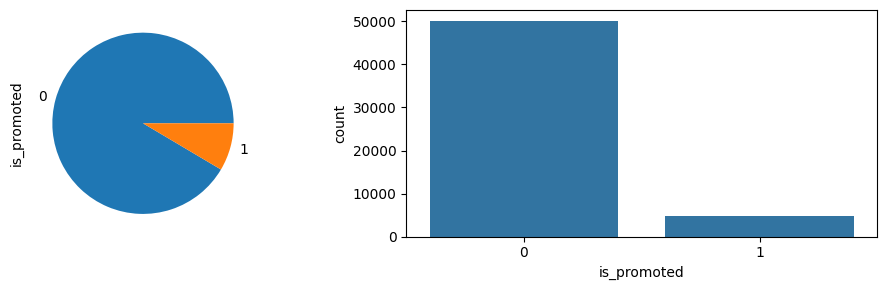

In [260]:
# chart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"],)
plt.tight_layout()
plt.show()

# there is a class imbalance because class 0 has more data points or observations than class 1

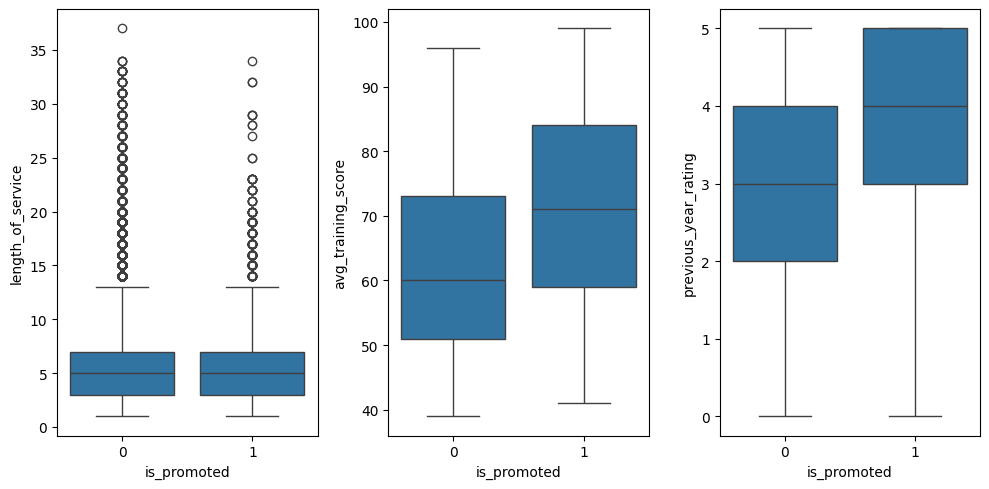

In [261]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["previous_year_rating"])
plt.tight_layout()
plt.show()

# For an employee If the avg_training_score value is higher then the chances of getting promoted are more.

<ipython-input-262-d6ed445e49b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_plot = sns.heatmap(data.corr(), annot = True, linewidths=3)


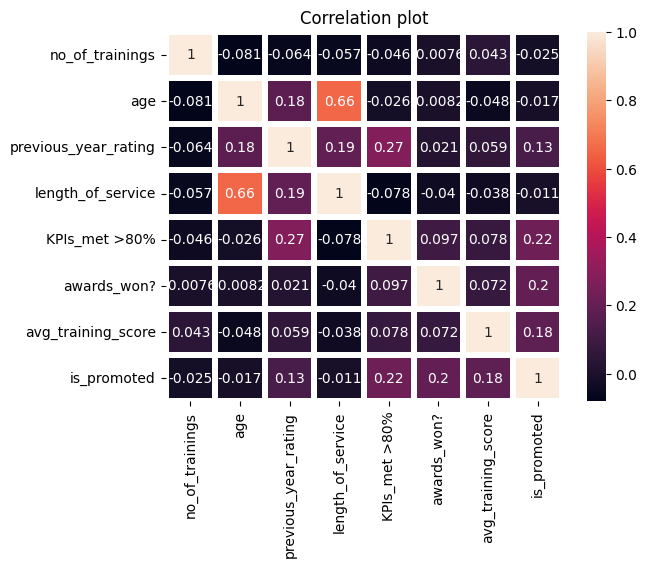

In [262]:
#correlation between features
corr_plot = sns.heatmap(data.corr(), annot = True, linewidths=3)
plt.title("Correlation plot")
plt.show()

# None of the features is highly correlated with each other except age and length of the service.

In [263]:
# One-Hot Encoding to convert categories into Numeric
data['gender'] = data['gender'].map({'m':1,'f':0})
data.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,1,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,0,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,1,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,1,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,1,sourcing,1,32,5.0,5,1,0,54,0


In [264]:
cols = data.select_dtypes(["object"]).columns
cols

Index(['department', 'region', 'education', 'recruitment_channel'], dtype='object')

In [265]:
# #Create dummy variables
# ds=pd.get_dummies(data[cols],drop_first=True)
# ds
# #concat newly created columns with original dataframe
# data=pd.concat([data,ds],axis=1)
# #Drop original columns
# data.drop(cols,axis=1,inplace=True)


In [266]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(drop='first')
# passing categorical columns to the Encoder and converting resulting columns, for each unique category, to the df
enc_df = pd.DataFrame(enc.fit_transform(data[['department', 'region', 'education', 'recruitment_channel']]).toarray())
# merge with main df bridge_df on key values
data = data.join(enc_df)
data.drop(cols,axis=1,inplace=True)
# bridge_df

In [267]:
len(data.columns)

54